# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 3: Exploratory Data Analysis - Retail

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
● As a business manager, try to find out the weak areas where you can
work to make more profit.<br>
● What all business problems you can derive by exploring the data?

### 1. Importing the required header files 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2. Reading the data

In [ ]:
#Dataset: https://bit.ly/3i4rbWl

#Reading the csv file using pandas library
data = pd.read_csv('SampleSuperstore.csv')
#Printing shape of data
print(data.shape)
#Displaying 5 records
data.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


* There are total of 9934 records and 13 features in our dataset.

In [ ]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


* There are total of 9934 entries in data and all are not null.

In [ ]:
#Basic description about the data such as count, mean, std, etc.
#The below details is only for numerical fields of data(In our case all columns are numerical). 
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 3. Preparing the data

In [ ]:
#Counting total number of duplicate records
print('There are total of',data.duplicated().sum(),'duplicate entry.')

There are total of 17 duplicate entry.


In [ ]:
#Dropping the duplicate record
data = data.drop_duplicates()
data.shape

(9977, 13)

### 4. Exploratory Data Analysis

#### Analysis on categorical features

In [ ]:
#Picking all columns with type as object
data_cat = data.select_dtypes('object')

In [ ]:
#Getting all unique value for each category
for i in data_cat.columns:
  print(i,'(',len(set(data_cat[i])),'category ) :',set(data_cat[i]))

Ship Mode ( 4 category ) : {'Same Day', 'Second Class', 'First Class', 'Standard Class'}
Segment ( 3 category ) : {'Corporate', 'Home Office', 'Consumer'}
Country ( 1 category ) : {'United States'}
City ( 531 category ) : {'Huntington Beach', 'Encinitas', 'San Francisco', 'Palm Coast', 'Midland', 'Bolingbrook', 'Margate', 'Westfield', 'Sheboygan', 'Fayetteville', 'Frisco', 'Altoona', 'Leominster', 'Fresno', 'Wheeling', 'Morgan Hill', 'Manhattan', 'Vancouver', 'Laurel', 'Huntsville', 'Holland', 'Gresham', 'Lake Elsinore', 'Saginaw', 'El Cajon', 'Danville', 'Vallejo', 'Avondale', 'Thomasville', 'Deer Park', 'Eau Claire', 'Littleton', 'Canton', 'Bethlehem', 'Tallahassee', 'Bloomington', 'Boynton Beach', 'Clifton', 'Bryan', 'Meridian', 'Columbus', 'Waterbury', 'Marion', 'Delray Beach', 'Milwaukee', 'Grand Island', 'Gladstone', 'Durham', 'Mesa', 'Fargo', 'Beaumont', 'Park Ridge', 'Roseville', 'Skokie', 'Olympia', 'Broomfield', 'Citrus Heights', 'Whittier', 'Memphis', 'Lehi', 'Hendersonville

* We can see except Country feature all has multiple categories.
* So, we can remove Country features.

In [ ]:
#Removing Country feature
data_cat = data_cat.drop('Country', axis=1)

##### Ship Mode

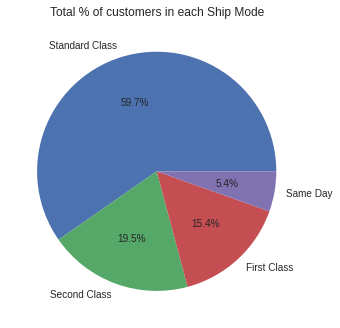

In [ ]:
plt.title('Total % of customers in each Ship Mode')
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

* 59.7% of customers are of Standard class.

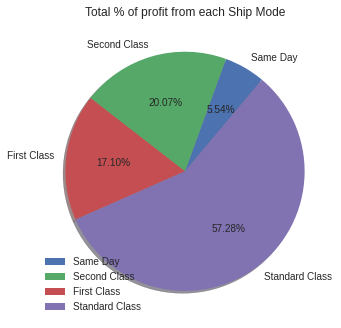

In [ ]:
total_profit = data['Profit'].sum()
shipmode_profit = []
for i in set(data['Ship Mode']):
  shipmode_profit.append(sum(data['Profit'].loc[data['Ship Mode'] == i]))
  
cat = 'Same Day', 'Second Class', 'First Class', 'Standard Class'
sizes = [(shipmode_profit[0] * 100) / total_profit,(shipmode_profit[1] * 100) / total_profit, (shipmode_profit[2] * 100) / total_profit, (shipmode_profit[3] * 100) / total_profit]
fig, ax = plt.subplots()
ax.pie(sizes, labels=cat, autopct='%.2f%%', shadow=True, startangle=50)
plt.legend()
plt.title('Total % of profit from each Ship Mode')
plt.show()

* A very high % of profit comes from standard class customers that is 57.28%.
* Same Day Ship Mode gives only 5.54% of total profit.

##### Segment

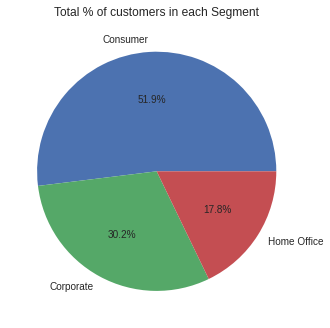

In [ ]:
plt.title('Total % of customers in each Segment')
plt.pie(data['Segment'].value_counts(), labels=data['Segment'].value_counts().index,autopct='%1.1f%%')
plt.show()

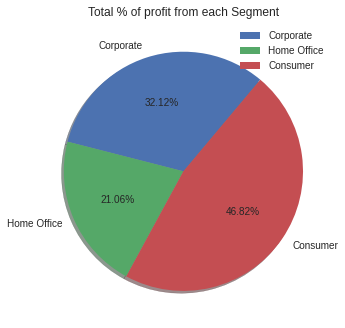

In [ ]:
total_profit = data['Profit'].sum()
seg_profit = []
for i in set(data['Segment']):
  seg_profit.append(sum(data['Profit'].loc[data['Segment'] == i]))
  
cat = 'Corporate', 'Home Office', 'Consumer'
sizes = [(seg_profit[0] * 100) / total_profit,(seg_profit[1] * 100) / total_profit, (seg_profit[2] * 100) / total_profit]
fig, ax = plt.subplots()
ax.pie(sizes, labels=cat, autopct='%.2f%%', shadow=True, startangle=50)
plt.legend()
plt.title('Total % of profit from each Segment')
plt.show()

* 46.82% of profit comes from Consumer segment where it has total of 51.9% of customer.

##### State

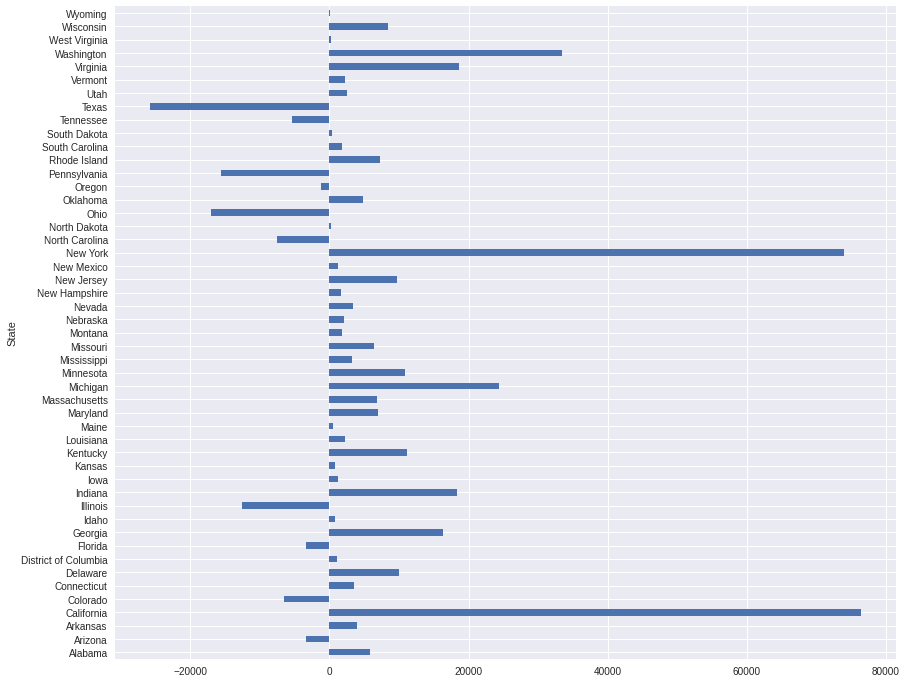

In [ ]:
plt.figure(figsize=(14,12))
statewise = data.groupby(['State'])['Profit'].sum()
statewise.plot.barh() # h for horizontal bar plot

* A high amount of profit comes from California and New York state.
* So we should concentrate on the states like New York and California to make more profits.

##### City

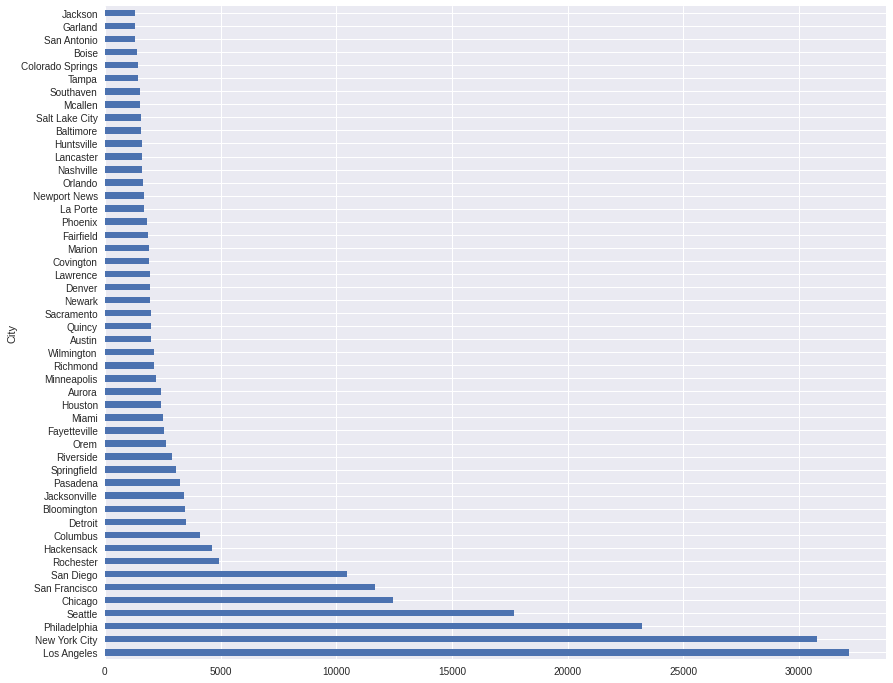

In [ ]:
plt.figure(figsize=(14,12))
citywise = data.groupby(['City'])['Profit'].sum().nlargest(50)
citywise.plot.barh() # h for horizontal bar plot

* Above bar plot clearly shows that concentrating on city such as San Fransisco, New York City, Chicago, Los Angeles will increase profit as these cities are already giving high amount of profit as compare to other cities.

##### Region

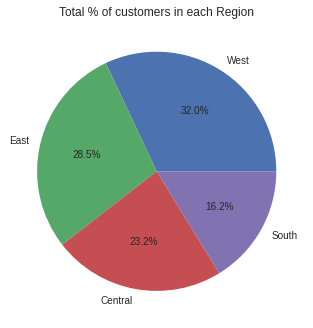

In [ ]:
plt.title('Total % of customers in each Region')
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

* Increasing sales more in the East will give more profit whereas South region gives very less profit.

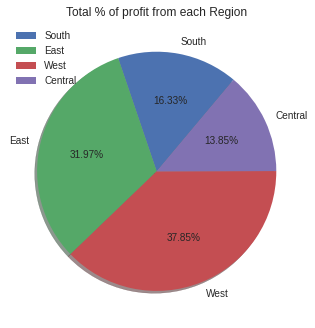

In [ ]:
total_profit = data['Profit'].sum()
reg_profit = []
for i in set(data['Region']):
  reg_profit.append(sum(data['Profit'].loc[data['Region'] == i]))
  
cat = 'South', 'East', 'West', 'Central'
sizes = [(reg_profit[0] * 100) / total_profit,(reg_profit[1] * 100) / total_profit, (reg_profit[2] * 100) / total_profit, (reg_profit[3] * 100) / total_profit]
fig, ax = plt.subplots()
ax.pie(sizes, labels=cat, autopct='%.2f%%', shadow=True, startangle=50)
plt.legend()
plt.title('Total % of profit from each Region')
plt.show()

* We can see that around 70% of total profit comes from only east and west regions.

##### Category & Sub-Category

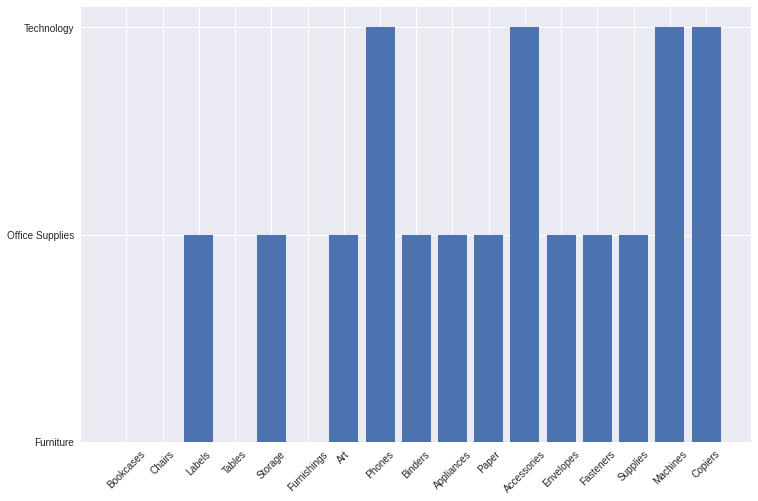

In [ ]:
#Lets see how sub-categories are distributed w.r.t to category
plt.figure(figsize=(12,8))
plt.bar('Sub-Category','Category',data=data)
plt.xticks(rotation = 45)
plt.show()

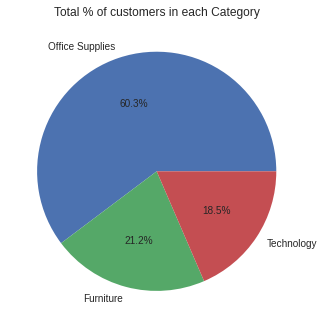

In [ ]:
plt.title('Total % of customers in each Category')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

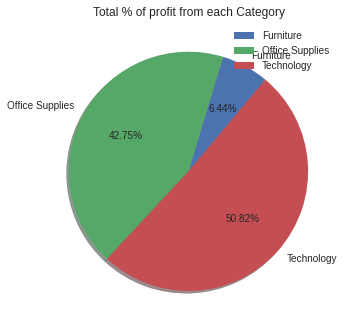

In [ ]:
total_profit = data['Profit'].sum()
cat_profit = []
for i in set(data['Category']):
  cat_profit.append(sum(data['Profit'].loc[data['Category'] == i]))
  
cat = 'Furniture', 'Office Supplies', 'Technology'
sizes = [(cat_profit[0] * 100) / total_profit,(cat_profit[1] * 100) / total_profit, (cat_profit[2] * 100) / total_profit]
fig, ax = plt.subplots()
ax.pie(sizes, labels=cat, autopct='%.2f%%', shadow=True, startangle=50)
plt.legend()
plt.title('Total % of profit from each Category')
plt.show()

* There are 60.3% of sales are from Office supplies but Technology category gives more profit. 

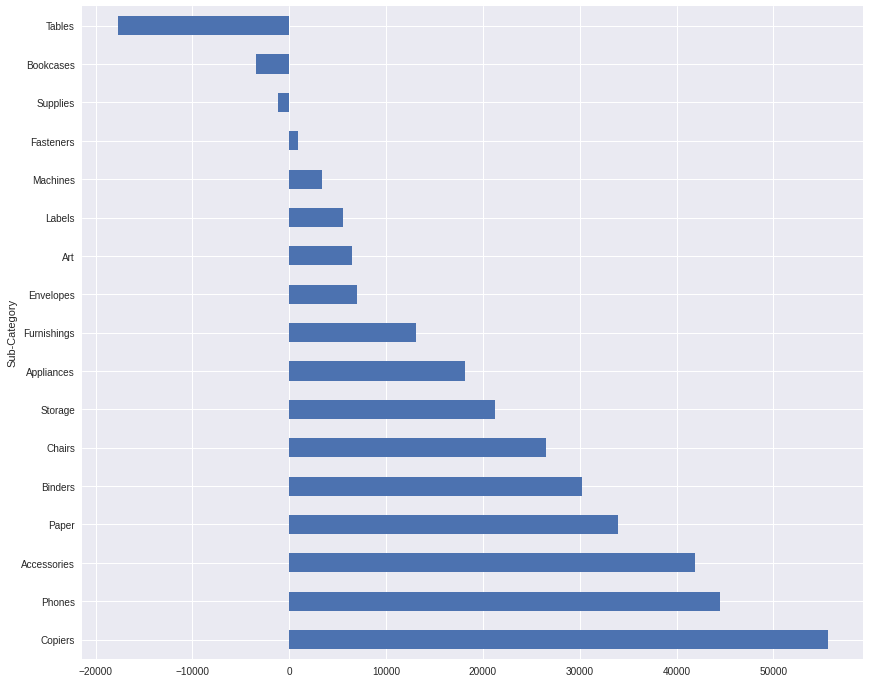

In [ ]:
plt.figure(figsize=(14,12))
subcatwise = data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
subcatwise.plot.barh() # h for horizontal bar plot

* Furnitures like book cases and chair gives loss i.e. we are not getting the ROI on it but products like accessories, phones, copiers like technolgy things are giving much more profits.

#### Analysis on numerical features

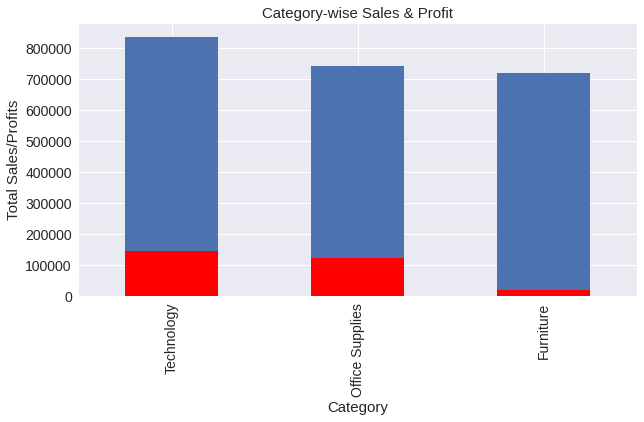

In [ ]:
# computing top categories in terms of sales from first 100 observations
top_category_s = data.groupby("Category").Sales.sum().nlargest(n=100)
# computing top categories in terms of profit from first 100 observations
top_category_p = data.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Category-wise Sales & Profit",fontsize = 15)
plt.show()

* Technology Category gives more profit w.r.t. its sale.

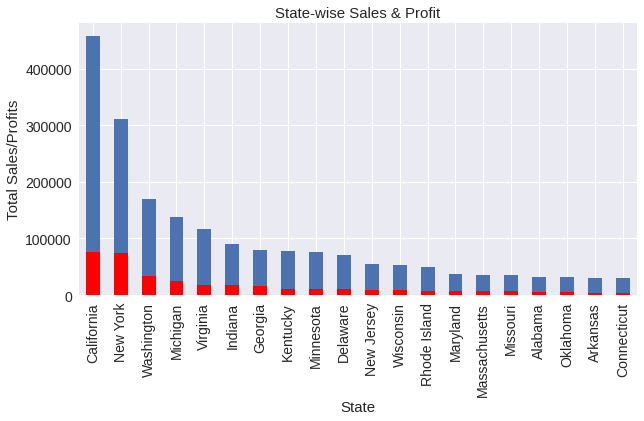

In [ ]:
# computing top categories in terms of sales from first 100 observations
top_state_s = data.groupby("State").Sales.sum().nlargest(n=20)
# computing top categories in terms of profit from first 100 observations
top_state_p = data.groupby("State").Profit.sum().nlargest(n=20)

# plotting to see it visually
plt.style.use('seaborn')
top_state_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_state_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('State',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("State-wise Sales & Profit",fontsize = 15)
plt.show()

* State like California, Washington, New York are having good sale and profit ratio.

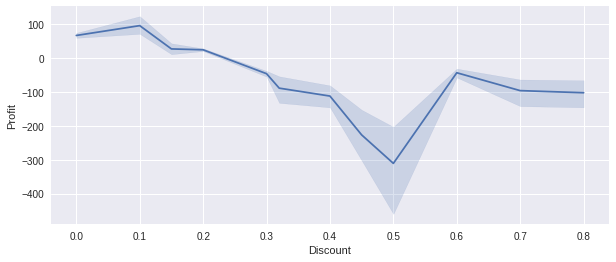

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = data)
plt.show()

* Giving very high discount reduces the profit.
* But gving discounts like 10% also increases profit as compare to not giving any discount.

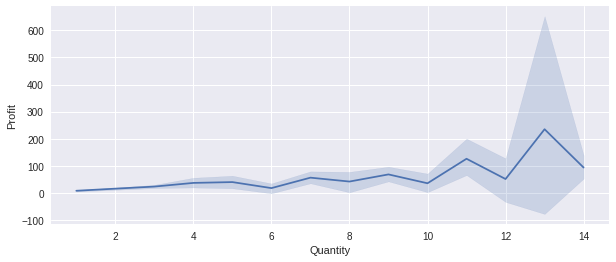

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot('Quantity', 'Profit', data = data)
plt.show()

* As the number of quantity increases profit also increases but there might be some deviation as it is not monotonic.

### 5. Conclusion

* A very high % of profit comes from standard class customers that is 57.28%, so focussing on sale of standard class Ship Mode will increase revenue.
* A high amount of profit comes from California and New York state, so concentrating on more sales in states like New York and California will make more profits.
* Concentrating on city such as San Fransisco, New York City, Chicago, Los Angeles will increase profit as these cities are already giving high amount of profit as compare to other cities.
* Around 70% of total profit comes from only east and west regions, so we should concentrate more on thes region to increase sale and gain more profits from it.
* Furnitures like book cases and chair gives loss i.e. we are not getting the ROI on it but products like accessories, phones, copiers like technolgy things are giving much more profits.
* Giving very high discount reduces the profit but gving discounts like 10% also increases profit as compare to not giving any discount.
* We should limit sales of furniture and increase that of technology as furniture has very less profit as compared to sales.